In [ ]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,#
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO #
# DESTE EP. #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM, #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM #
# DESONESTIDADE ACADÊMICA OU PLÁGIO. #
# #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. #
# #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR #
# DESONESTIDADE ACADÊMICA. #
# #
# #
# Nome : # Mikhail Futorny
# NUSP : # 5258765
# Turma: # MAC-0417
# Prof.: # Ronaldo Fumio Hashimoto #  fundo branco, aumentei margem n-7
##################################################################

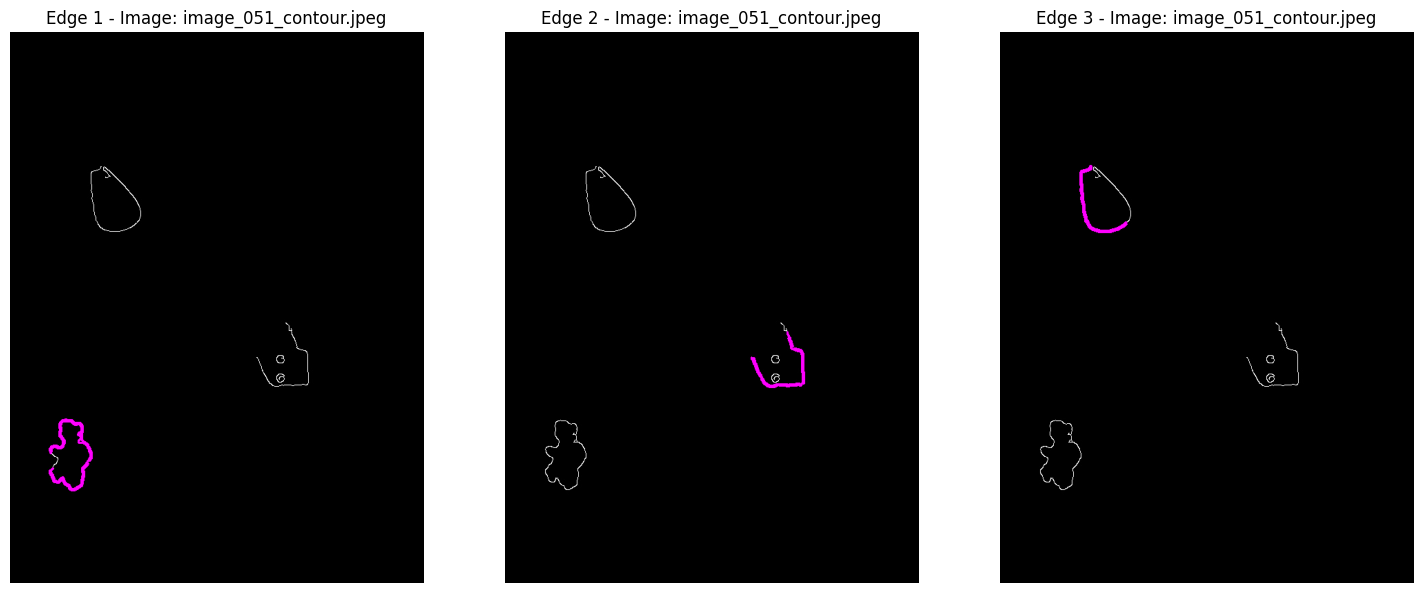

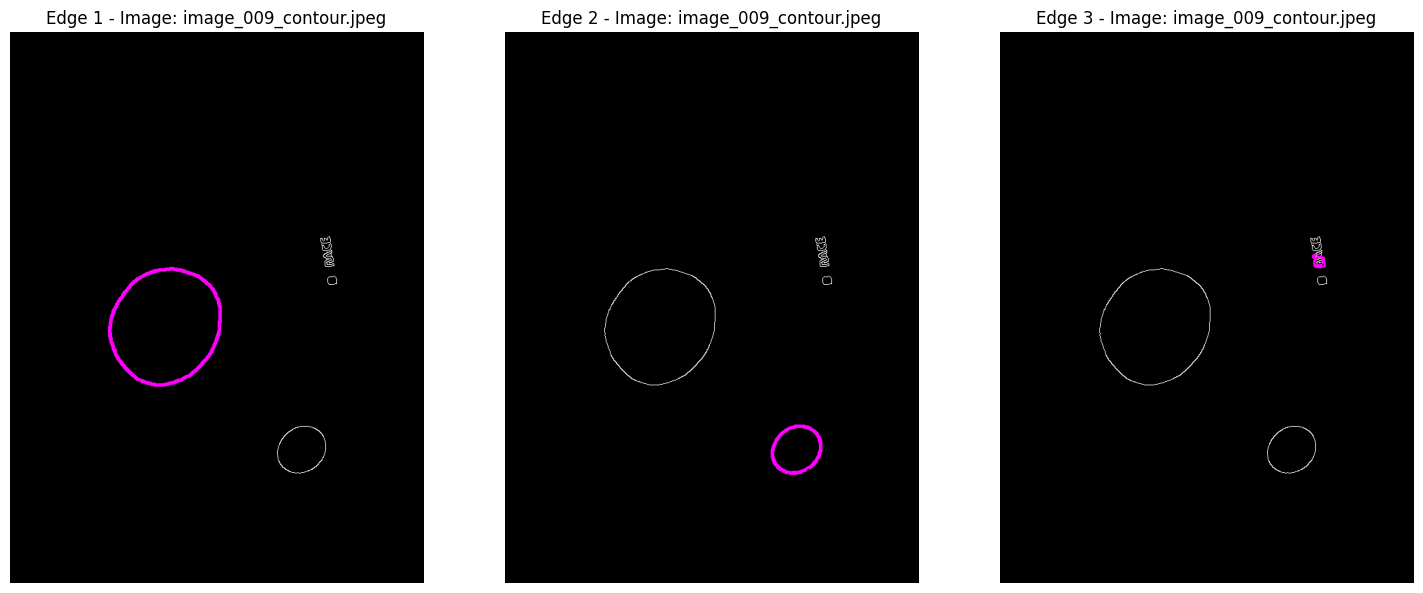

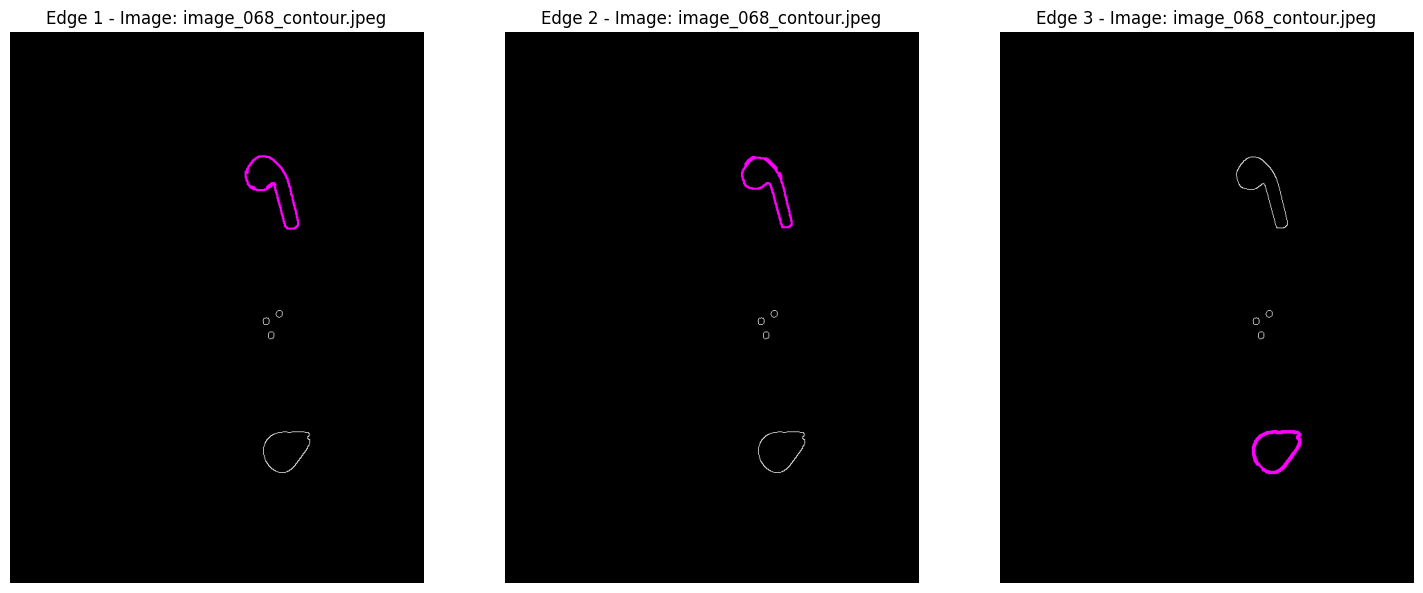

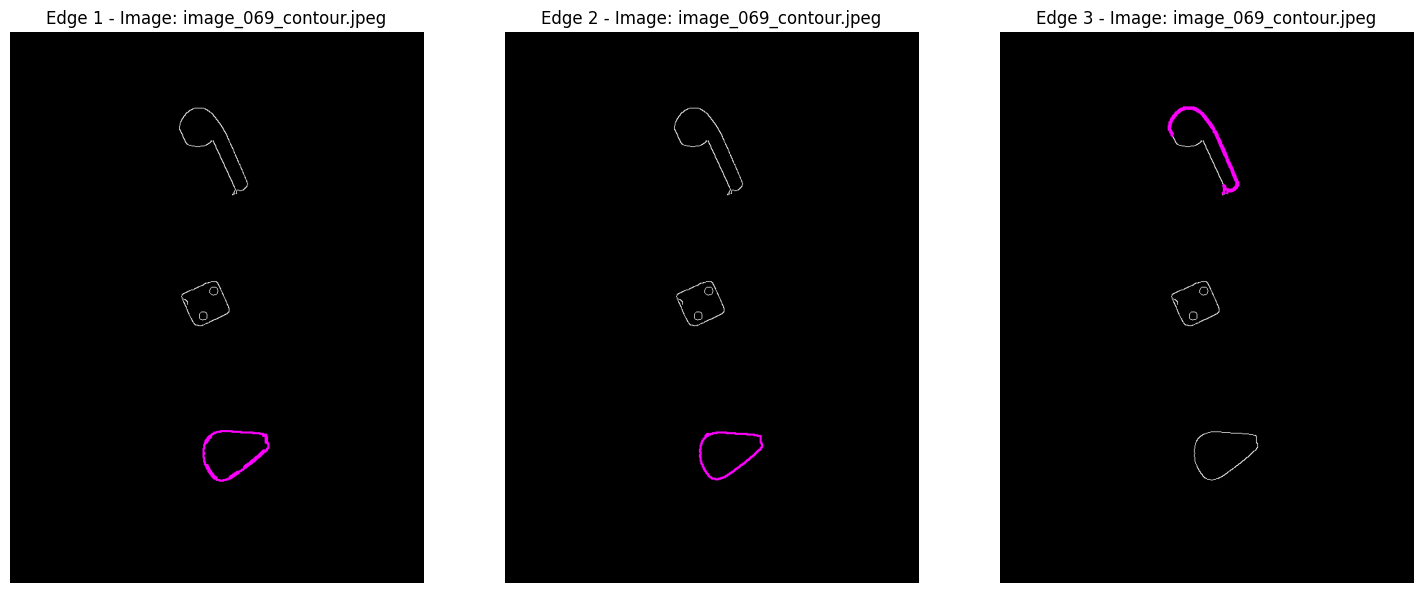

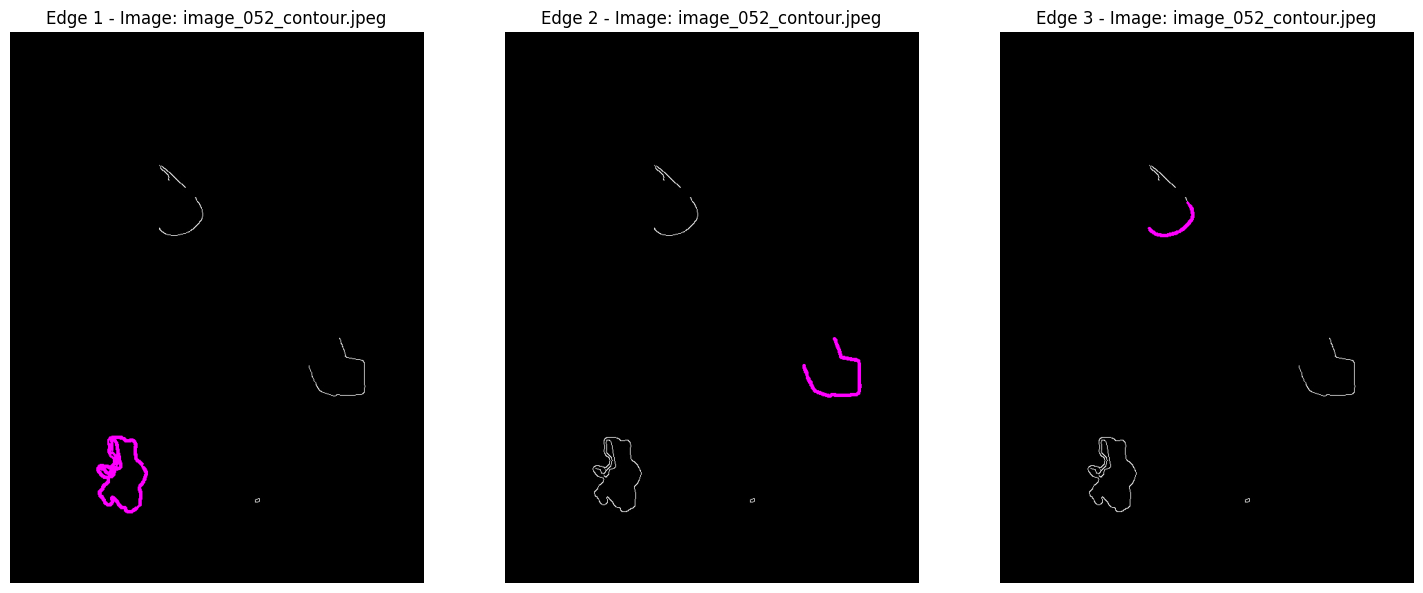

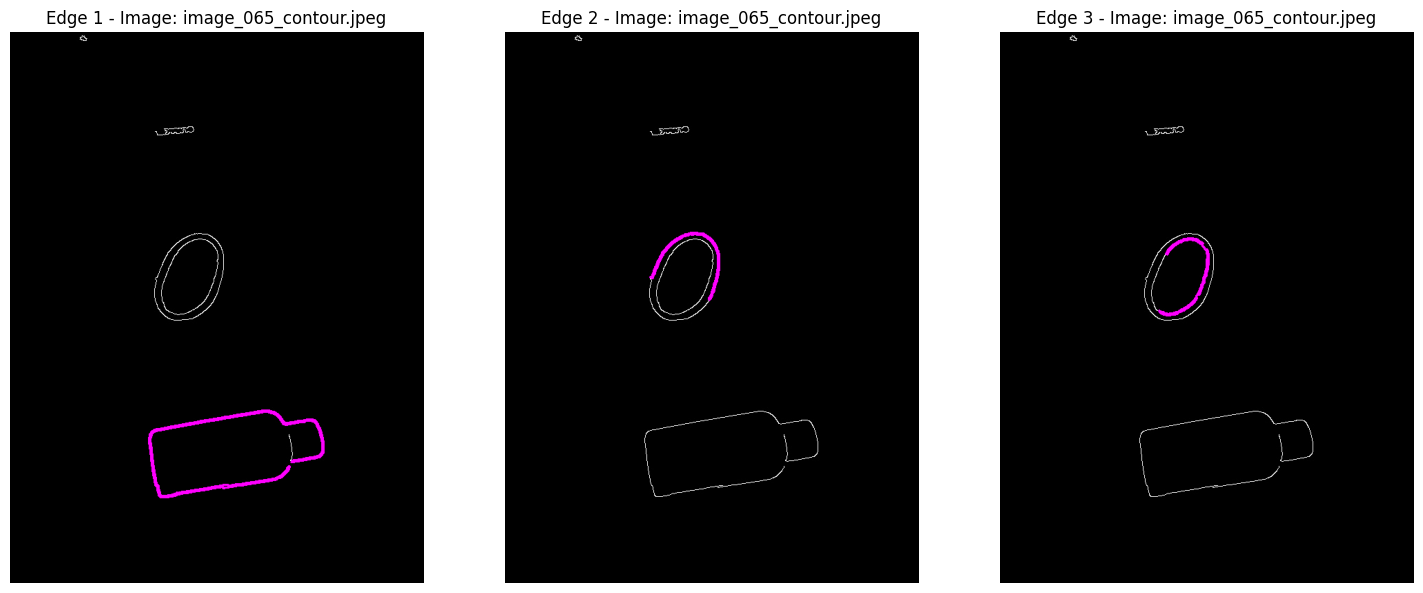

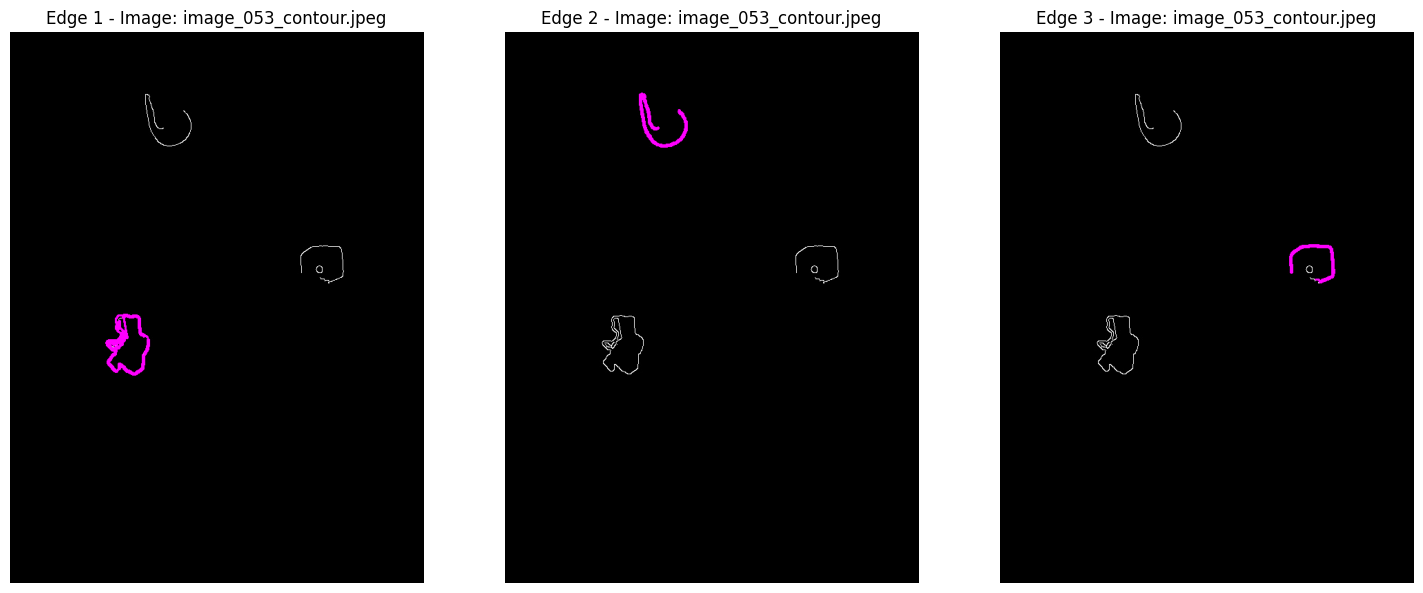

      Objeto  Classe    Área    Diâmetro       Minor                  Imagem
0   pingente       0   495.0  131.385182   72.645389  image_051_contour.jpeg
1       dado       1   341.0  105.439940   85.561768  image_051_contour.jpeg
2     concha       2   300.0  141.918661   54.333681  image_051_contour.jpeg
3   elastico       0   911.0  241.173725  219.764068  image_009_contour.jpeg
4       anel       1   381.0  104.349537   90.301101  image_009_contour.jpeg
5      pilha       2    73.0   25.220511   19.660893  image_009_contour.jpeg
6       fone       0   537.0  140.624643   60.689719  image_068_contour.jpeg
7       fone       1   356.0   98.834080   77.259841  image_068_contour.jpeg
8    concha        0   470.0  129.528639   91.750784  image_069_contour.jpeg
9     concha       1   400.0  201.612846   65.195442  image_069_contour.jpeg
10  pingente       0   826.0  127.554606   78.708882  image_052_contour.jpeg
11      dado       1   402.0  108.843763   98.923386  image_052_contour.jpeg

In [12]:

#Essa celula é para preenchimento manual do dataframe para identificacao dos objetos, 
#e para o resto da classificação (diametro, Area ...)



from skimage.measure import label, regionprops
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def extrair_caracteristicas(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Aplica Canny Edge Detection para encontrar os contornos
    edges = cv2.Canny(img_gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Limita a avaliação aos 3 maiores contornos (se não repetiria muito)
    contours = contours[:3]

    contour_img = np.zeros_like(img)
    cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 1)

    # Mostra as imagens para seleção manual
    plt.figure(figsize=(15, 6)) 
    objetos = []
    for i, contour in enumerate(contours):
        plt.subplot(1, 3, i + 1)
        img_contour = img.copy()
        cv2.drawContours(img_contour, [contour], -1, (255, 0, 255), 2)
        plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB))
        plt.title(f'Edge {i + 1} - Image: {os.path.basename(img_path)}')  
        plt.axis('off')
        
        # Solicita entrada do usuário para o número do objeto
        objeto = input(f'Insira o nome do objeto para o contorno {i + 1}: ')
        objetos.append(objeto)


    plt.tight_layout()
    plt.show()

    # Cria a tabela de características com os dados coletados
    label_img = label(contour_img[:, :, 0], connectivity=2)
    props = regionprops(label_img)
    props.sort(key=lambda x: x.area, reverse=True)

    tabela_caracteristicas = []  # Tabela que vamos preencher
    for i, prop in enumerate(props):
        area = prop.area
        diametro = prop.major_axis_length
        minor = prop.minor_axis_length

        tabela_caracteristicas.append({
            'Objeto': objetos[i],  # Usa o input do usuário como número do objeto
            'Classe': i,  
            'Área': area,
            'Diâmetro': diametro,
            'Minor': minor,
            'Imagem': os.path.basename(img_path)
        })

    return tabela_caracteristicas


folder_path = './content/selecionadas/'  # Subdiretório que deseja percorrer
caracteristicas = []

for filename in os.listdir(folder_path):
    if filename.endswith('.jpeg'):
        img_path = os.path.join(folder_path, filename)
        caracteristicas.extend(extrair_caracteristicas(img_path))

df = pd.DataFrame(caracteristicas)
print(df)

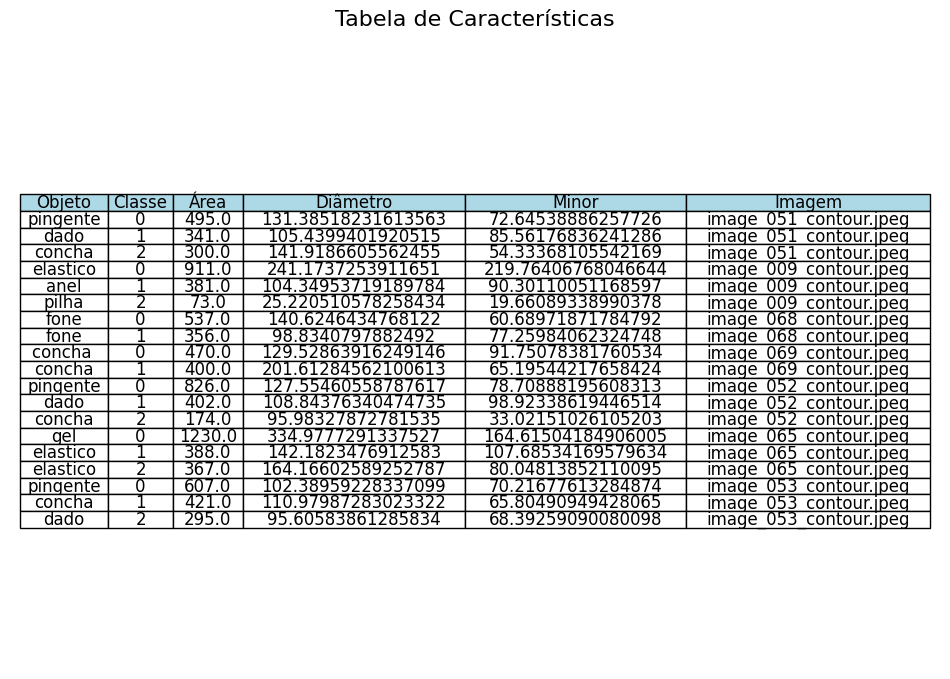

In [14]:
#Imprime tabela
fig, ax = plt.subplots(figsize=(12, 8))

ax.axis('off')

table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=['lightblue']*len(df.columns))

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df.columns))))

plt.title('Tabela de Características', fontsize=16, pad=20)
plt.show()